In [10]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os

# [IAPR][iapr]: Project


**Group ID:** xx

**Author 1 (sciper):** Camille Delgrange (282250)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

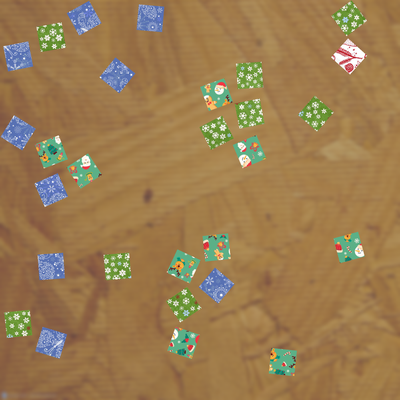

In [17]:
# Include the path to the folder containing the images of the project description:
PATH_EXAMPLE = "data_project/train2/"

# Show the images in the notebook:
def show_image(image: Union[str, np.ndarray]):
    if isinstance(image, str):
        image = PIL.Image.open(image)
    # display images in smaller size:
    image.thumbnail((400, 400), PIL.Image.LANCZOS)
    display(image)

# Show the images from the PATH_EXAMPLE folder:
def show_example_images():
    for image_path in glob(PATH_EXAMPLE + "*.png"):
        # show only the first image example:
        show_image(image_path)
        break

show_example_images()

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:

<img src="data_project/project_description/train_00.png" width="512"/>


### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="data_project/project_description/solution_example.png" width="512"/>
\\
Solution 2
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each input image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image and M images, and each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [18]:
## load images
import os 
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def load_input_image(image_index,  folder ="train2", path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder, filename )
    
    im= Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers, folder ="train2", path = "data_project", group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)


In [161]:
def auto_canny(image, sigma=0.33): 
	# sigma represents the standard deviation of the Gaussian filter
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

In [162]:
def apply_may_morph(mask):
    """
    Apply morphological operations to the mask to remove noise and fill in holes
    """
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # dilate the mask to fill in holes
    kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6)) # erode the mask to get rid of noise
    kernel_close =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) # close the mask
    kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # open the mask

    mask_dilate = cv2.dilate(mask.astype(np.uint8), kernel_dilate, iterations=9)
    mask_erode = cv2.erode(mask_dilate, kernel_erode, iterations=7)
    mask_open = cv2.morphologyEx(mask_erode, cv2.MORPH_OPEN, kernel_open, iterations=6)
    mask_close = cv2.morphologyEx(mask_open, cv2.MORPH_CLOSE, kernel_close, iterations=6)

    return mask_close

In [163]:
def segment_image(img):
    """
    Segment the image to retrieve the tiles. The function converts the image to grayscale, applies a Gaussian blur, 
    applies a threshold to get a binary image, inverts the image and applies Canny edge detection.

    """
    # 1. Convert the image to grayscale:

    train_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2. Apply a Gaussian blur to the image:

    blurred = cv2.GaussianBlur(train_gray, (5, 5), 10)

    # 3. Apply a threshold to the image, to get a binary image:
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 4. invert the image to avoid the background being detected as a contour
    img_inv = 255-thresh

    # 5. Apply Canny edge detection:
    auto = auto_canny(img_inv)
    return auto

In [166]:
def segment_image(img):
    """
    Segment the image to retrieve the tiles. The function converts the image to HSV and performs k-means clustering (k=2)

    """

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    blur = cv2.GaussianBlur(hsv, (5,5), 10)
    # hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)

    # reshape the image to a 2D array of pixels and 3 color values (HSV)
    # blur_0 = blur[:,:,0]
    im_reshaped = blur.reshape((-1,3))
    im_reshaped = np.float32(im_reshaped)
    # define and apply k-means clustering to separate the background and the tiles
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.5)

    # # OPTION 1 
    K = 2
    ret,label,center=cv2.kmeans(im_reshaped,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # reshape the result and convert back to uint8 and define a mask
    center = np.uint8(center)
    mask = center[label.flatten()]
    vals = np.unique(mask, axis=0)
    mask[np.all(mask == vals[0], axis=1)] = 0
    mask[np.all(mask == vals[1], axis=1)] = 255
    mask = mask.reshape((blur.shape))

    # put to black the background and white the objects
    if np.sum(mask == 255) > np.sum(mask == 0): # if background is white
        mask_def = ~mask
        print("inverted")
    else:
        mask_def = mask
        print("not inverted")
    return mask_def

In [167]:
def get_contours(img, mask):
    """
    Get the contours of the objects in the mask
    """
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

    final_contours = []
    coords = []
    im_draw = img.copy()
    tiles = []

    for cnt in contours:
        # cnt is a list of points of the contour of a tile (x,y) coordinates of the contour, ordered clockwise
        x1, y2 = cnt[0][0] # top left corner
        approx = cv2.approxPolyDP(cnt, 0.09*cv2.arcLength(cnt, True), True) # approximate the contour with accuracy proportional to the contour perimeter

        if len(approx) == 4: # if the contour has 4 corners
            rect = cv2.minAreaRect(cnt) # get the rectangle that encloses the contour
            (x, y), (w, h), a = rect # get the coordinates of the center, width, height, and angle of rotation of the rectangle
            ratio = float(w)/h # compute the ratio of the width to the height of the rectangle
            if 0.8 < ratio < 1.2: # if the ratio is close to 1, the rectangle is a square, and the contour is a tile
                # the order of the box points: bottom left, top left, top right,
                # bottom right
                box = cv2.boxPoints(rect) # get the coordinates of the corners of the rectangle
                box = np.int0(box) # convert the coordinates to integers
                if cv2.contourArea(box) > 7000: # if the area of the rectangle is large enough, the contour is a tile
                    im_draw = cv2.drawContours(im_draw, [box], 0, (0, 255, 0), 4) # draw contours in green color
                     # get width and height of the detected rectangle
                    width = int(rect[1][0])
                    height = int(rect[1][1])
                    src_pts = box.astype("float32")
                    # coordinate of the points in box points after the rectangle has been
                    # straightened
                    dst_pts = np.array([[0, height-1],
                            [0, 0],
                            [width-1, 0],
                            [width-1, height-1]], dtype="float32")

                    # the perspective transformation matrix
                    M = cv2.getPerspectiveTransform(src_pts, dst_pts)

                    # directly warp the rotated rectangle to get the straightened rectangle
                    warped = cv2.warpPerspective(img, M, (width, height))
                    tiles.append(warped)
                    final_contours.append(box) # add the coordinates of the corners of the rectangle to the list of contours
                    coords.append(box[0]) # get the coordinates of the top left corner of the rectangle
            else:
                im_draw = cv2.drawContours(im_draw, [cnt], 0, (255, 0, 0), 4) # draw contours in red color

    return final_contours, coords, im_draw, tiles

not inverted


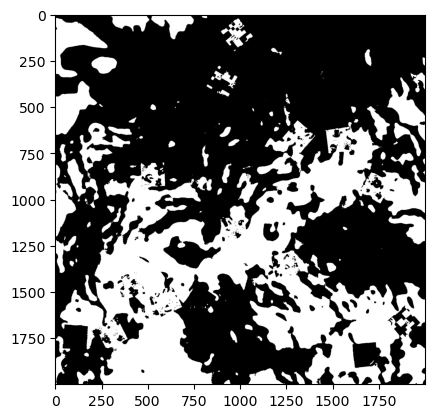

In [168]:
im = load_input_image(1)
md = segment_image(im)
plt.imshow(md, cmap = 'gray')

(2000, 2000, 3)

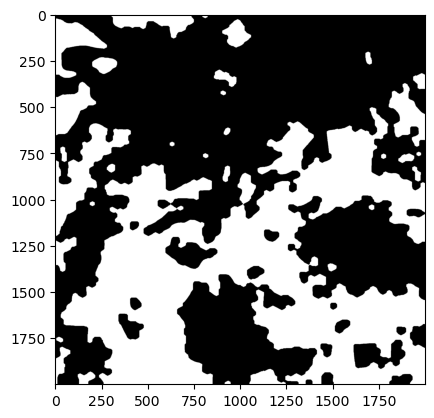

In [169]:
res = apply_may_morph(md)
plt.imshow(res,  cmap = 'gray');
res.shape

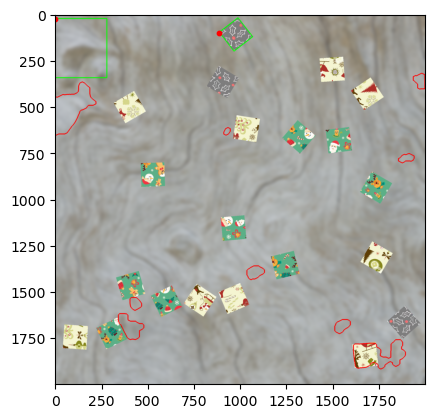

In [170]:
final_contours, coords, im_draw, tiles = get_contours(im, res)
plt.imshow(im_draw)
plt.scatter([x for x,y in coords], [y for x,y in coords], c ='r', s=10)

(130, 129, 3)
(128, 129, 3)
(130, 127, 3)
(128, 128, 3)
(126, 140, 3)
(126, 127, 3)
(125, 129, 3)
(126, 128, 3)
(130, 126, 3)
(129, 124, 3)
(128, 124, 3)
(127, 125, 3)
(127, 125, 3)
(123, 129, 3)
(123, 127, 3)
(129, 123, 3)
(127, 124, 3)
(128, 123, 3)
(127, 125, 3)
(127, 125, 3)
(128, 122, 3)
(125, 127, 3)
(122, 132, 3)
(128, 123, 3)
(117, 126, 3)
(124, 120, 3)
(116, 101, 3)


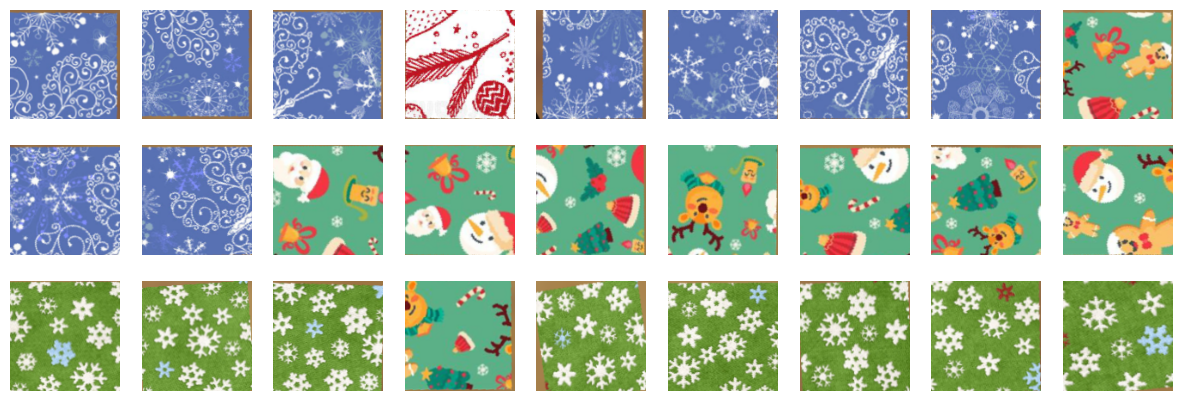

In [155]:
# Show the subplot of the 27 tiles obtained from the first image:
fig, axes = plt.subplots(3, 9, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    #print(tiles[i].shape)
    # resize the images to 128x128 pixels:
    tiles[i] = cv2.resize(tiles[i], (128, 128))
    ax.imshow(tiles[i])
    ax.set_axis_off()
plt.show()

[array([[1660, 1190],
       [1819, 1147],
       [1860, 1300],
       [1701, 1343]], dtype=int64), array([[677, 175],
       [694,  -4],
       [854,  10],
       [837, 190]], dtype=int64), array([[ 513, 1272],
       [ 677, 1258],
       [ 690, 1416],
       [ 527, 1430]], dtype=int64), array([[ 184, 1269],
       [ 348, 1260],
       [ 357, 1421],
       [ 192, 1429]], dtype=int64), array([[ 166, 1776],
       [ 211, 1627],
       [ 366, 1673],
       [ 321, 1823]], dtype=int64), array([[1337, 1892],
       [1354, 1735],
       [1515, 1753],
       [1498, 1910]], dtype=int64), array([[  -2, 1558],
       [ 182, 1551],
       [ 188, 1709],
       [   3, 1716]], dtype=int64), array([[1479,  577],
       [1584,  460],
       [1702,  566],
       [1596,  683]], dtype=int64), array([[487, 393],
       [582, 270],
       [708, 368],
       [612, 491]], dtype=int64)]
1860


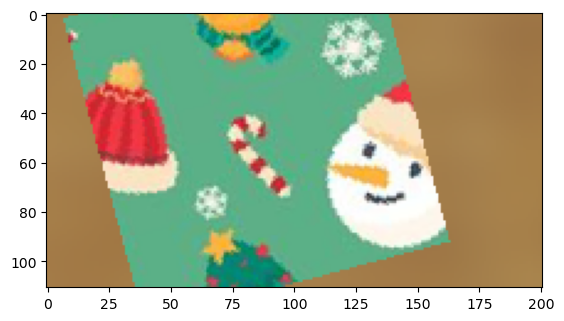

In [95]:
# Extract the tiles from the 4 corners of the rectangle in final_contours:
print(final_contours)
print(final_contours[0][2][0])
# Crop image from 4 (x,y) coordinates:
#img[top_left_y:bot_right_y+1, top_left_x:bot_right_x+1]
tile_1 = im[final_contours[0][0][1]:final_contours[0][2][1]+1, final_contours[0][0][0]:final_contours[0][2][0]+1]
plt.imshow(tile_1)

not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
inverted
inverted
not inverted


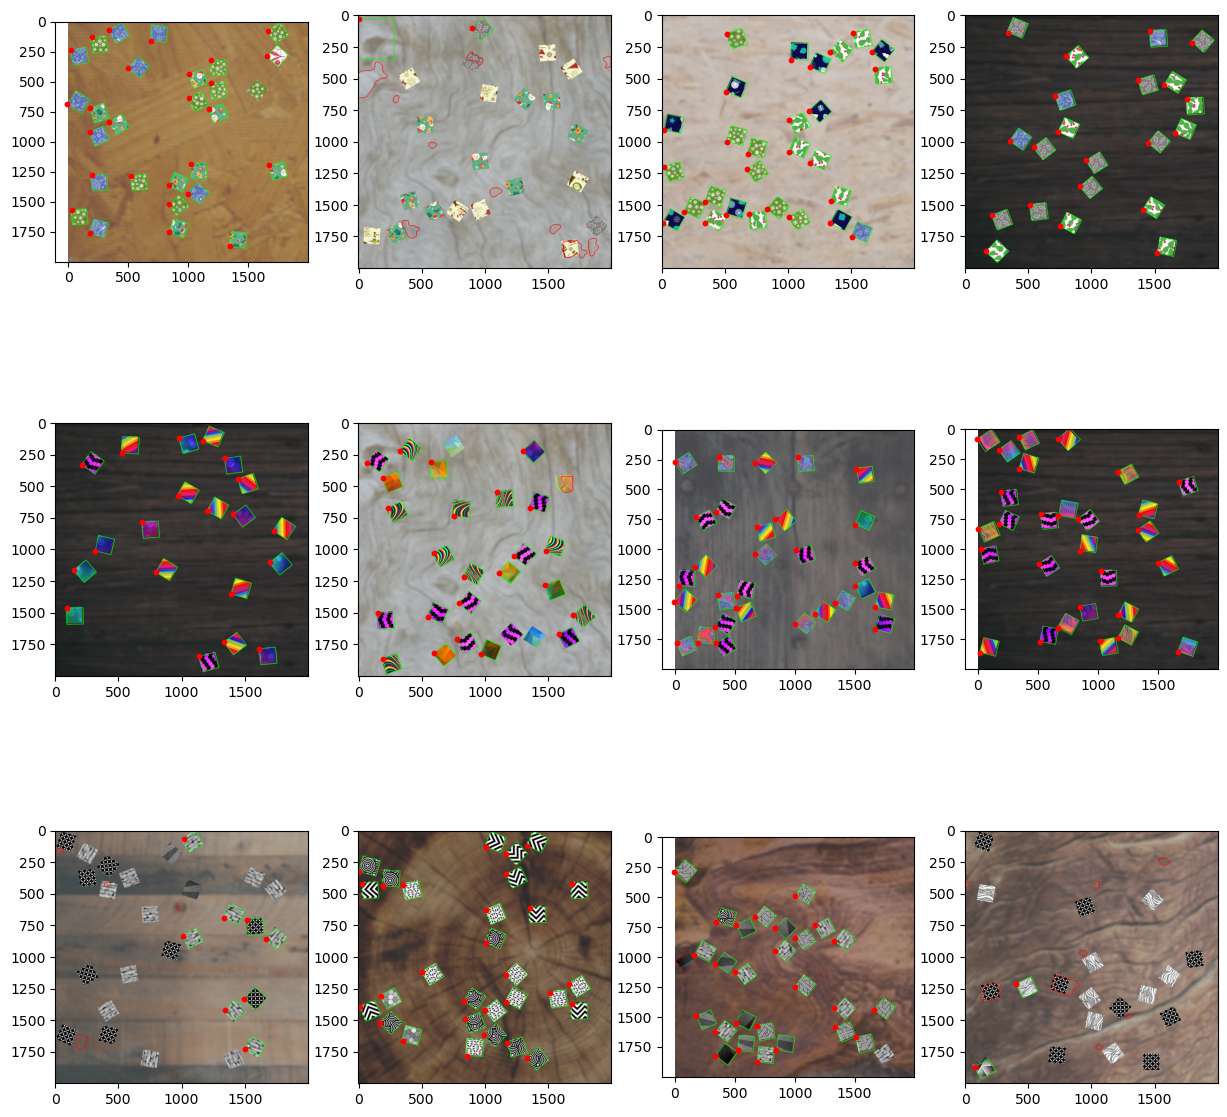

In [126]:
ls = [str(i) for i in range(12)]
# fig, ax = plt.subplot_mosaic([ls], figsize=(15, 15))
fig, axs = plt.subplots(3, 4, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    im = load_input_image(i)
    md = segment_image(im)
    res = apply_may_morph(md)
    final_contours, coords, im_draw, tiles = get_contours(im, res)
    
    ax.imshow(im_draw)
    ax.scatter([x for x,y in coords], [y for x,y in coords], c='r', s=10)

In [158]:
def get_tiles(image_index, folder_image = "train2", folder ="tiles", path = "data_project"):
    im = load_input_image(image_index, folder_image, path)
    md = segment_image(im)
    res = apply_may_morph(md)
    _, _, _, tiles = get_contours(im, res)
    # Extract the tiles as 128x128 images and save them in folder "tiles" in .png format:
    for i, tile in enumerate(tiles):
        filename = os.path.join(path, folder, "tile_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(tile).save(filename)

In [160]:
for i in range(12): # there are 12 images in the folder "train2"
    get_tiles(i)

not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
inverted
inverted
not inverted


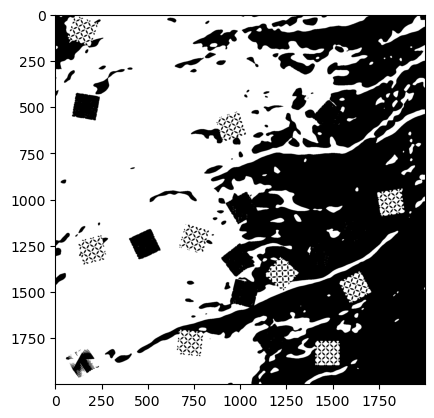

In [49]:
# 1. Convert the image to grayscale:

train_gray = cv2.cvtColor(load_input_image(11), cv2.COLOR_BGR2GRAY)

# 2. Apply a Gaussian blur to the image:

blurred = cv2.GaussianBlur(train_gray, (5, 5), 10)

# 3. Apply a threshold to the image, to get a binary image:
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 4. invert the image to avoid the background being detected as a contour
img_inv = 255-thresh

# 5. Apply Canny edge detection:
auto = auto_canny(img_inv)

# 6. Apply morphological operations to the mask to remove noise and fill in holes:
#auto = apply_may_morph(auto)

# 7. Show the output Canny edge map:
plt.imshow(thresh, cmap = 'gray') #"Auto Edge Map", 
plt.show()

In [115]:
def segment_pieces_from_background(train):
    """ This functions segments the puzzle pieces from the background and extracts them as individual images."""

    # From a training image of size 2000x2000 pixels, we extract the puzzle pieces as individual images of size 128x128 pixels:
    # 1. Convert the image to grayscale:

    train_gray = cv2.cvtColor(train, cv2.COLOR_BGR2GRAY)

    # 2. Apply a threshold to the image, to get a binary image:
    ret, thresh = cv2.threshold(train_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # normalize the image to 0-255
    img = cv2.normalize(thresh, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)

    # initialize the image where the outer contours will be drawn, which needs to be in RGB format
    outer_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # display the binary image:
    #plt.imshow(img, cmap = 'gray')
    #plt.show()

    # invert the image to avoid the background being detected as a contour
    img_inv = 255-img

    # display the inverted image:
    #plt.imshow(img_inv, cmap = 'gray')
    #plt.show()

    # 3. Find the contours of the puzzle pieces in the binary image:

    contours, hierarchy = cv2.findContours(img_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    # RETR_TREE retrieves all of the contours and reconstructs a full hierarchy of nested contours. CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points.
    # RETR_EXTERNAL retrieves only the extreme outer contours. It sets hierarchy[i][2]=hierarchy[i][3]=-1 for all the contours.

    # find outer contours, those whitout parent 
    #ParentContour = hierarchy [0, :,3]
    #WithoutParentContour = (ParentContour==-1).nonzero()[0]
    # = [contours[i] for i in WithoutParentContour]

    # define image where to draw the outer contours
    for cnt in contours:
        cv2.drawContours(outer_image, [cnt], 0, (0,255,0), 2)

    # display the image with the outer contours:
    plt.imshow(outer_image)
    plt.show()

    # 4. Extract the puzzle pieces from the image:

    # define a list where the puzzle pieces will be stored
    puzzle_pieces = []

    # define a list where the outer contours will be stored
    outer_contours = []
    
    # crop the original image with the contours:
    i = 0
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        puzzle_pieces.append(train[y:y+h,x:x+w])
        if i < 5:
            plt.imshow(train[y:y+h,x:x+w])
            plt.show()
            i += 1
        outer_contours.append(cnt)

    return outer_contours, puzzle_pieces

In [20]:
def display_img(img, title, cmap=None):
    fig, ax = plt.subplots(1, len(img), figsize=(10, 10))
    ax.imshow(img, cmap)
    ax.axis('off')
    ax.set_title(title, fontsize=24)
    plt.show()

In [ ]:
contours, pieces = segment_pieces_from_background(load_input_image(0))
# Display the first piece in gray scale with the contours drawn in green:
print('Number of pieces:', len(pieces))
#print(pieces)
#display_img(pieces[0], 'Piece 0', cmap='gray')

In [ ]:
# 1. Convert the image to grayscale:

train_gray = cv2.cvtColor(load_input_image(0), cv2.COLOR_BGR2GRAY)

# 2. Apply a threshold to the image, to get a binary image:
ret, thresh = cv2.threshold(train_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# normalize the image to 0-255
img = cv2.normalize(thresh, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)

# initialize the image where the outer contours will be drawn, which needs to be in RGB format
outer_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# display the binary image:
#plt.imshow(outer_image)
#plt.show()

# invert the image to avoid the background being detected as a contour
img_inv = 255-img


# finding the center of image
#image_center = (img_inv.shape[0]/2, img_inv.shape[1]/2)

#if img_inv is None:
    #print('can not read the image data')
# finding image contours
contours, hier = cv2.findContours(img_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# finding distance of each contour from the center of image
d_min = 1000
rect_mins = []
for contour in contours:
    # finding bounding rectangles of 128x128 pixels around the contours:
    if cv2.contourArea(contour) > 500:
        rect = cv2.boundingRect(contour) # x,y are the coordinates of the top left corner of the rectangle and w,h are its width and height.
        #rect = cv2.minAreaRect(contour) # rect[0] = center, rect[1] = width, rect[2] = height, rect[3] = angle
    #print(rect[0], rect[1], rect[2], rect[3])
    # Draw the rectangle contours on the image:
        cv2.rectangle(outer_image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 2)
    # skipping the outliers
    #if rect[3] > img_inv.shape[1]/2 and rect[2] > img_inv.shape[0]/2:
        #continue
    #pt1 = (rect[0], rect[1])
    # finding the center of bounding rect-digit
    #c = (rect[0]+rect[2]*1/2, rect[1]+rect[3]*1/2)
    # displaying the centers:
    #cv2.circle(outer_image, (int(c[0]), int(c[1])), 2, (0, 0, 255), 2)
    #d = np.sqrt((c[0] - image_center[0])**2 + (c[1]-image_center[1])**2)
    # finding the minimum distance from the center
    #if d < d_min:
        #d_min = d
        #rect_min = [pt1, (rect[2],rect[3])]
        #rect_mins.append(rect_min)
    #print(rect_min[1])
    # Draw the minimum rectangle contours on the image:
    #cv2.rectangle(outer_image, (rect_min[0][0], rect_min[0][1]), (rect_min[0][0] + rect_min[1][0], rect_min[0][1] + rect_min[1][1]), (255, 0, 0), 2)
    # (255, 0, 0) = blue 

# display the image in bigger size
fig = plt.figure(figsize=(20, 20))
plt.imshow(outer_image)
plt.show()

# fetching the image with desired padding
#pad = 0
#result = img_inv[rect_min[0][1]-pad:rect_min[0][1]+rect_min[1][1]+pad, rect_min[0][0]-pad:rect_min[0][0]+rect_min[1][0]+pad]

#plt.imshow(result*255, 'gray')
#plt.show()

In [ ]:
# 1. Convert the image to grayscale:

train_gray = cv2.cvtColor(load_input_image(2), cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(train_gray, (5, 5), 10)

# 2. Apply a threshold to the image, to get a binary image:
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# normalize the image to 0-255
#img = cv2.normalize(thresh, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)

# initialize the image where the outer contours will be drawn, which needs to be in RGB format
#outer_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)


# invert the image to avoid the background being detected as a contour
img_inv = 255-thresh

# show the original and blurred images
#plt.imshow("Original", load_input_image(0))
#plt.imshow("Blurred", img_inv)
# compute a "wide", "mid-range", "tight" and "auto" threshold for the edges
# using the Canny edge detector
wide = cv2.Canny(img_inv, 10, 200)
mid = cv2.Canny(img_inv, 30, 150)
tight = cv2.Canny(img_inv, 240, 250)
auto = auto_canny(img_inv)
#auto = apply_may_morph(auto)
print(auto)
# show the output Canny edge maps
#plt.imshow("Wide Edge Map", wide)
#cv2.imshow("Mid Edge Map", mid)
#cv2.imshow("Tight Edge Map", tight)
plt.imshow(auto, cmap = 'gray') #"Auto Edge Map", 
plt.show()
#cv2.waitKey(0)

# Perform canny edge detection of the squared pieces of 128x128 pixels:
# edges = cv2.Canny(img_inv, 100, 200) # 100 and 200 are the thresholds for the hysteresis procedure, which is used to determine whether a pixel is an edge or not. 
# The smaller the threshold, the more likely it is that a pixel will be labeled as an edge.

# display the edges:
#plt.imshow(edges, cmap = 'gray')
#plt.show()

In [8]:
def segment_pieces_from_background(train):
    """ This functions segments the puzzle pieces from the background and extracts them as individual images."""
    ROIs = []
    print(train.shape)

    # Grayscale + binrarization:
    gray = cv2.cvtColor(train,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Find contours, obtain bounding box, extract and save ROI
    output = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output
    # Returns: 
    # The total number of unique labels (i.e., number of total components) that were detected
    # A mask named labels has the same spatial dimensions as our input thresh image. 
    # For each location in labels, we have an integer ID value that corresponds to the connected component where the pixel belongs. 
    # You’ll learn how to filter the labels matrix later in this section.
    # stats: Statistics on each connected component, including the bounding box coordinates and area (in pixels).
    # The centroids (i.e., center) (x, y)-coordinates of each connected component.
    # loop over the number of unique connected component labels
    for i in range(1, numLabels):
	# if this is the first component then we examine the *background* (typically we would just ignore this component in our loop)
        if i == 0:
            text = "examining component {}/{} (background)".format(i + 1, numLabels)
        # otherwise, we are examining an actual connected component
        else:
            text = "examining component {}/{}".format(i + 1, numLabels)
        # print a status message update for the current connected
        # component
        print("[INFO] {}".format(text))
        # extract the connected component statistics and centroid for the current label:
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        piece = train[y:y+h, x:x+w]
        ROIs.append(piece)
        #area = stats[i, cv2.CC_STAT_AREA]
        (cX, cY) = centroids[i]
        # clone our original image (so we can draw on it) and then draw a bounding box surrounding the connected component along with a circle corresponding to the centroid
        # For display purposes only: 
        output = train.copy()
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
        # construct a mask for the current connected component by
        # finding a pixels in the labels array that have the current
        # connected component ID
        componentMask = (labels == i).astype("uint8") * 255
        # For display purposes only: 
        # show our output image and connected component mask
        cv2.imshow("Output", output)
        cv2.imshow("Connected Component", componentMask)
        cv2.startWindowThread()
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        if i == 5:
            break
    return ROIs

(2000, 2000, 3)
[INFO] examining component 2/3381
[INFO] examining component 3/3381
[INFO] examining component 4/3381
[INFO] examining component 5/3381
[INFO] examining component 6/3381


In [ ]:
# For each training image, we segment the puzzle pieces from the background and extract them as individual images:
for i in range(1, 14):
    train = load_input_image(i)
    puzzle_pieces = segment_pieces_from_background(train)
    plt.imshow(puzzle_pieces, cmap="gray")
    plt.show()

In [8]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper function to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
   
    
    
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

data_project\train_solution_06


In [9]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)

solving  6
data_project\train_solution_00
solving  10
data_project\train_solution_00


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$
